<a href="https://colab.research.google.com/github/snaby/1d-system/blob/master/1d_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## Exercises - Predicting dynamics of a known, simple system

Suppose that you encounter a particle moving in one dimension whose dynamics are governed by a potential of the following form:

$$
  \phi(x) = \frac{1}{2}\omega^2 x^2
$$

where $\omega > 0$ is a positive, real number.

1. -- $\ddot{x}(t)=-\omega^{2}x(t)$ This equation is called a simple harmonic oscillator. 
1. --$x(t)=x_{0}cos(\omega t)+v_{0}/\omega sin(\omega t)$
1. -- The quantity $m\phi(x(t))$ is not conserved along the trajectory because this is the potential energy. The total energy is conserved and gets exchanged between potential and kinetic. 
1. -- This quantity is conserved, as it represents the total energy of the system. We can show this by taking $dQ/dt$, which is 
$$ \frac{dQ}{dt} = m\dot{x}(t)\ddot{x}(t)+m\frac{d\phi}{dt}\\
=m\dot{x}(t)\ddot{x}(t)+m\phi'(x(t))\dot{x}(t)\\
=m\dot{x}(t)\left(\ddot{x}(t)-\phi'(x(t))\right)$$
The last expression is zero because $\ddot{x}(t)=\phi'(x(t))$, so Q is conserved. 
1. 
    1. -- The motion will look sinusoidal in x and $\dot{x}$ with a sine-like shape in x and a cosine-like shape in $\dot{x}$. See cell below for plots. 
    1. -- If we plot x versus v instead we will see a circle because x is just a cosine function with amplitude 1 and v is a sine function with amplitude 1 which is just the unit circle. 
    1. -- See plot below, it agrees!
1. 
    1. -- The x and v plots will now be swapped, x will behave like a cosine and v will behave like a sine. 
    1. --We expect the plot to be the unit circle, again, because you are still plotting cosine versus sine with the same amplitude. 
    1. --Our plot agress with our prediction. 

Text(0.5, 0.98, 'Harmonic Oscillator x versus v')

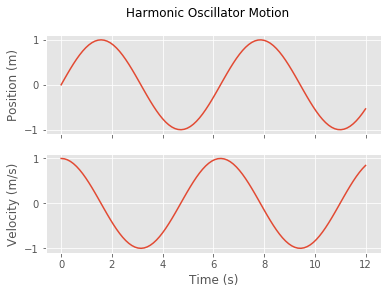

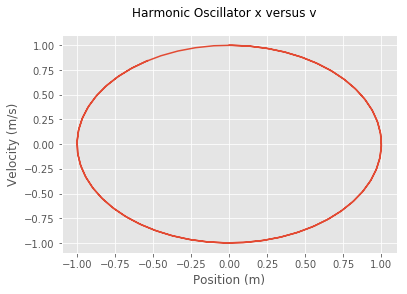

In [ ]:
x0 = 0
v0 = 1
omega = 1

t_arr = np.linspace(0, 12, 100)
x_arr = x0*np.cos(omega*t_arr) + v0/omega*np.sin(omega*t_arr)
xdot_arr = -omega*x0*np.sin(omega*t_arr) + v0*np.cos(omega*t_arr)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t_arr, x_arr)
ax[1].plot(t_arr, xdot_arr)

ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')

ax[1].set_ylabel('Velocity (m/s)')

fig.suptitle('Harmonic Oscillator Motion')

fig2, ax2 = plt.subplots()
ax2.plot(x_arr, xdot_arr)

ax2.set_xlabel('Position (m)')
ax2.set_ylabel('Velocity (m/s)')

fig2.suptitle('Harmonic Oscillator x versus v')

Text(0.5, 0.98, 'Harmonic Oscillator x versus v')

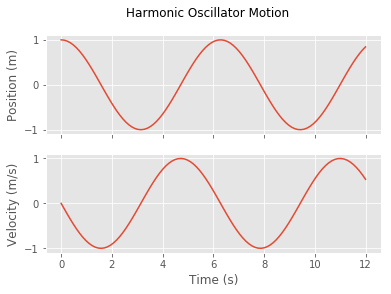

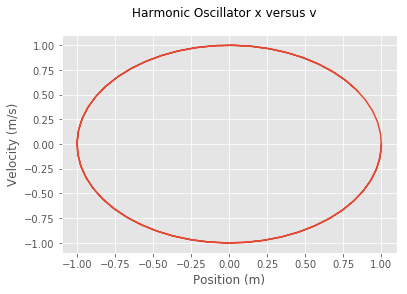

In [ ]:
x0 = 1
v0 = 0
omega = 1

t_arr = np.linspace(0, 12, 100)
x_arr = x0*np.cos(omega*t_arr) + v0/omega*np.sin(omega*t_arr)
xdot_arr = -omega*x0*np.sin(omega*t_arr) + v0*np.cos(omega*t_arr)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t_arr, x_arr)
ax[1].plot(t_arr, xdot_arr)

ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')

ax[1].set_ylabel('Velocity (m/s)')

fig.suptitle('Harmonic Oscillator Motion')

fig2, ax2 = plt.subplots()
ax2.plot(x_arr, xdot_arr)

ax2.set_xlabel('Position (m)')
ax2.set_ylabel('Velocity (m/s)')

fig2.suptitle('Harmonic Oscillator x versus v')

## Exercises - Using your predictions to test the dynamics code

1. --h is the time step whereas N is the number of time steps taken. 
1. -- $\omega$ is the angular frequency with units of radians per second. 
1. --$T=2\pi/\omega$ is the period of oscillations, which gives a natural temporal scale on which the system changes noteably. For a certain duration of time $\Delta t$ to be small that would mean that the system is not doing much of an oscillation, which is true under the condition $\Delta t<<T$. 

1. -- We think it should be much smaller than T because if h were larger than or comparable to T we would not be able to resolve motion inside of the oscillations. Increasing our time steps, increases accuracy of our answer. We cannot make it perfectly continuous but we want to try to achieve something very close to continuous. 
1. --We chose intial conditions $x_{0}=0 m$, $v_{0}=1 m/s$, and $\omega=1$ $s^{-1}$
1. -- See plots below.
1. -- Version 2 seems to be correct. All other versions diverge from the analytic solution. Version 4 does this subtlely but it can be seen from the x versus v plot that the amplitude is beginning to decrease even after ten periods. 
1. --In version 1, there is a mistake in the last line. kx_4 should be kv_4. In version 3, there is a minus sign in the definition of kv_3. It should be a plus sign. In version 4, kv_4 is defined to be 1.02 but it should be 1.0. In version 5, it returns -V instead of V.   

In [ ]:
def dynamics_solve_1d(a, t_0 = 0.0, x_0 = 1.0, v_0 = 0.0, h = 0.1, N = 100, version = "v1"):
    
    """ Solves for dynamics of a given 1d dynamical system governed by a second-order ODE:
    
        d^2x(t)/dt^2 = a(t, x(t))
    
    Args:
        a: A python function a(t, x) that assigns a float to each time and position.  Represents
        the acceleration at that time and position.
        
    Kwargs:
        t_0: Initial time (float) set to 0.0 as default
        x_0: Initial position (float) set to 1.0 as default
        v_0: Initial velocity (float) set to 0.0 as default
        h: Step size (float) set to 0.1 as default
        N: Number of steps (int) set to 100 as default
        version: The version of the numerical method to be used
    
    Returns:
        T: Numpy array of times
        X: Numpy array of positions at the times given in T
        V: Numpy array of velocities at the times given in T
    """

    T = np.array([t_0 + n * h for n in range(N + 1)])
    X = np.zeros(N + 1)
    V = np.zeros(N + 1)
        
    X[0] = x_0
    V[0] = v_0
    
    if version == "v1":
        for n in range(N):
            kx_1 = h * V[n]
            kv_1 = h * a(T[n], X[n])

            kx_2 = h * (V[n] + 0.5 * kv_1)
            kv_2 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_1)

            kx_3 = h * (V[n] + 0.5 * kv_2)
            kv_3 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_2)

            kx_4 = h * (V[n] + kv_3)
            kv_4 = h * a(T[n] + 1.0 * h, X[n] + 1.0 * kx_3)

            X[n + 1] = X[n] + (kx_1 + 2. * kx_2 + 2. * kx_3 + kx_4) / 6.
            V[n + 1] = V[n] + (kv_1 + 2. * kv_2 + 2. * kv_3 + kx_4) / 6.
        
        return T, X, V
    
    if version == "v2":
        for n in range(N):
            kx_1 = h * V[n]
            kv_1 = h * a(T[n], X[n])

            kx_2 = h * (V[n] + 0.5 * kv_1)
            kv_2 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_1)

            kx_3 = h * (V[n] + 0.5 * kv_2)
            kv_3 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_2)

            kx_4 = h * (V[n] + kv_3)
            kv_4 = h * a(T[n] + 1.0 * h, X[n] + 1.0 * kx_3)

            X[n + 1] = X[n] + (kx_1 + 2. * kx_2 + 2. * kx_3 + kx_4) / 6.
            V[n + 1] = V[n] + (kv_1 + 2. * kv_2 + 2. * kv_3 + kv_4) / 6.
            
        return T, X, V
            
    if version == "v3":
        for n in range(N):
            kx_1 = h * V[n]
            kv_1 = h * a(T[n], X[n])

            kx_2 = h * (V[n] + 0.5 * kv_1)
            kv_2 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_1)

            kx_3 = h * (V[n] + 0.5 * kv_2)
            kv_3 = h * a(T[n] + 0.5 * h, X[n] - 0.5 * kx_2)

            kx_4 = h * (V[n] + kv_3)
            kv_4 = h * a(T[n] + 1.0 * h, X[n] + 1.0 * kx_3)

            X[n + 1] = X[n] + (kx_1 + 2. * kx_2 + 2. * kx_3 + kx_4) / 6.
            V[n + 1] = V[n] + (kv_1 + 2. * kv_2 + 2. * kv_3 + kv_4) / 6.
            
        return T, X, V
    
    if version == "v4":
        for n in range(N):
            kx_1 = h * V[n]
            kv_1 = h * a(T[n], X[n])

            kx_2 = h * (V[n] + 0.5 * kv_1)
            kv_2 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_1)

            kx_3 = h * (V[n] + 0.5 * kv_2)
            kv_3 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_2) 

            kx_4 = h * (V[n] + kv_3)
            kv_4 = h * a(T[n] + 1.0 * h, X[n] + 1.02 * kx_3)

            X[n + 1] = X[n] + (kx_1 + 2. * kx_2 + 2. * kx_3 + kx_4) / 6.
            V[n + 1] = V[n] + (kv_1 + 2. * kv_2 + 2. * kv_3 + kv_4) / 6.
            
        return T, X, V
    
    if version == "v5":
        for n in range(N):
            kx_1 = h * V[n]
            kv_1 = h * a(T[n], X[n])

            kx_2 = h * (V[n] + 0.5 * kv_1)
            kv_2 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_1)

            kx_3 = h * (V[n] + 0.5 * kv_2)
            kv_3 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_2)

            kx_4 = h * (V[n] + kv_3)
            kv_4 = h * a(T[n] + 1.0 * h, X[n] + 1.0 * kx_3)

            X[n + 1] = X[n] + (kx_1 + 2. * kx_2 + 2. * kx_3 + kx_4) / 6.
            V[n + 1] = V[n] + (kv_1 + 2. * kv_2 + 2. * kv_3 + kv_4) / 6.
            
        return T, X, -V

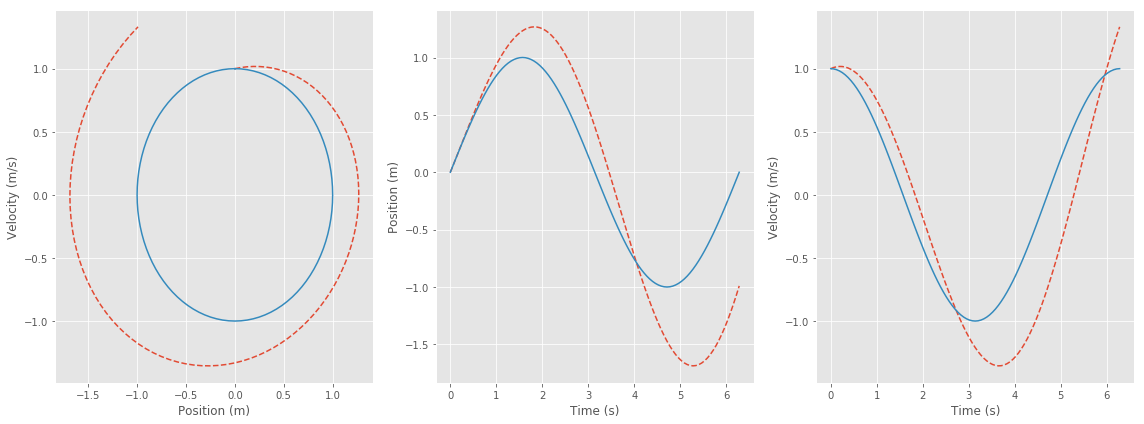

In [ ]:
# v1 

omega = 1
x0 = 0
v0 = 1
vers = 'v1'

def a(t,x):
  return -omega**2*x

T, X, V = dynamics_solve_1d(a, t_0 = 0.0, x_0 = 0.0, v_0 = 1.0, h = (2*np.pi/omega)/100, N = 1000, version = vers)
X_analytic, V_analytic = x0*np.cos(omega*T)+v0/omega*np.sin(omega*T), -x0*omega*np.sin(omega*T)+v0*np.cos(omega*T)

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
#plt.axes().set_aspect('auto')


ax[0].plot(X, V, '--')
ax[0].plot(X_analytic, V_analytic)
ax[0].set_xlabel('Position (m)')
ax[0].set_ylabel('Velocity (m/s)')

ax[1].plot(T, X, '--')
ax[1].plot(T, X_analytic)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Position (m)')

ax[2].plot(T, V, '--')
ax[2].plot(T, V_analytic)
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Velocity (m/s)')
fig.tight_layout()


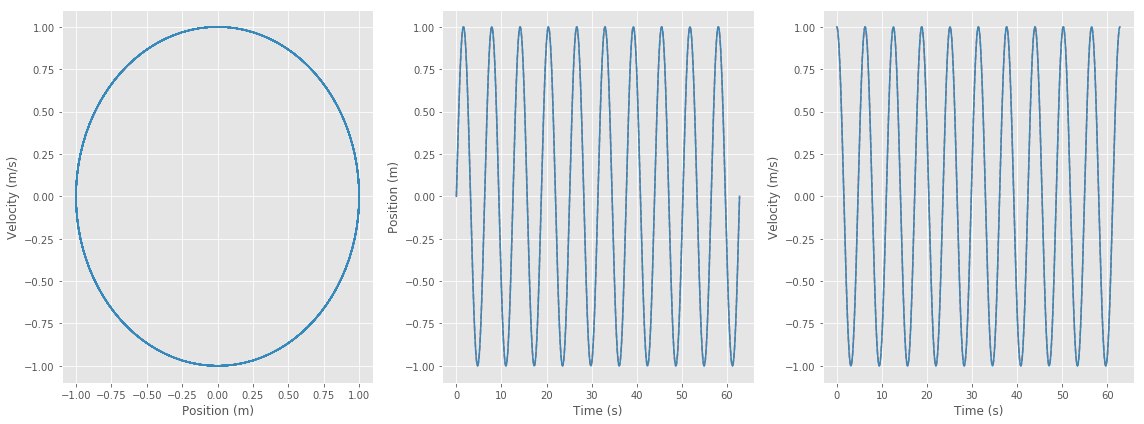

In [ ]:
# v2

omega = 1
x0 = 0
v0 = 1
vers = 'v2'

def a(t,x):
  return -omega**2*x

T, X, V = dynamics_solve_1d(a, t_0 = 0.0, x_0 = 0.0, v_0 = 1.0, h = (2*np.pi/omega)/100, N = 1000, version = vers)
X_analytic, V_analytic = x0*np.cos(omega*T)+v0/omega*np.sin(omega*T), -x0*omega*np.sin(omega*T)+v0*np.cos(omega*T)

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
#plt.axes().set_aspect('auto')


ax[0].plot(X, V, '--')
ax[0].plot(X_analytic, V_analytic)
ax[0].set_xlabel('Position (m)')
ax[0].set_ylabel('Velocity (m/s)')

ax[1].plot(T, X, '--')
ax[1].plot(T, X_analytic)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Position (m)')

ax[2].plot(T, V, '--')
ax[2].plot(T, V_analytic)
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Velocity (m/s)')
fig.tight_layout()


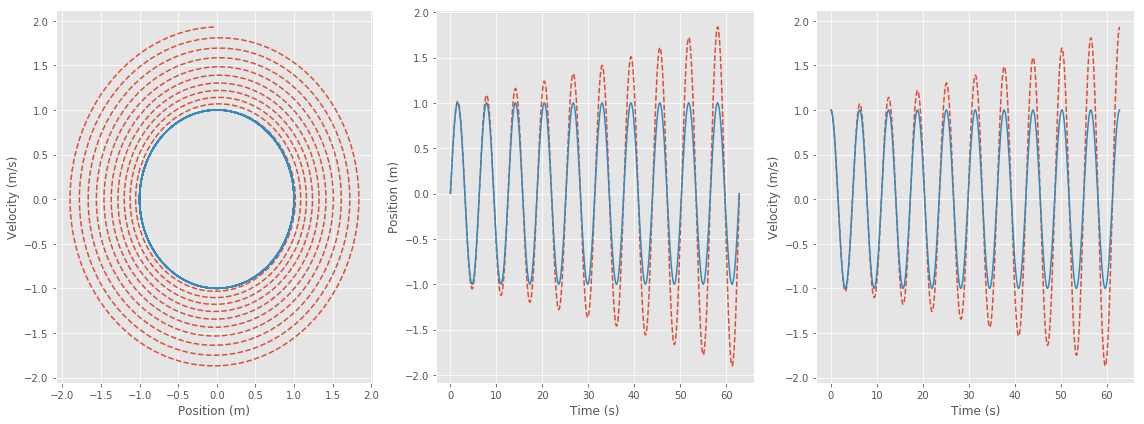

In [ ]:
# v3

omega = 1
x0 = 0
v0 = 1
vers = 'v3'

def a(t,x):
  return -omega**2*x

T, X, V = dynamics_solve_1d(a, t_0 = 0.0, x_0 = 0.0, v_0 = 1.0, h = (2*np.pi/omega)/100, N = 1000, version = vers)
X_analytic, V_analytic = x0*np.cos(omega*T)+v0/omega*np.sin(omega*T), -x0*omega*np.sin(omega*T)+v0*np.cos(omega*T)

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
#plt.axes().set_aspect('auto')


ax[0].plot(X, V, '--')
ax[0].plot(X_analytic, V_analytic)
ax[0].set_xlabel('Position (m)')
ax[0].set_ylabel('Velocity (m/s)')

ax[1].plot(T, X, '--')
ax[1].plot(T, X_analytic)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Position (m)')

ax[2].plot(T, V, '--')
ax[2].plot(T, V_analytic)
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Velocity (m/s)')
fig.tight_layout()


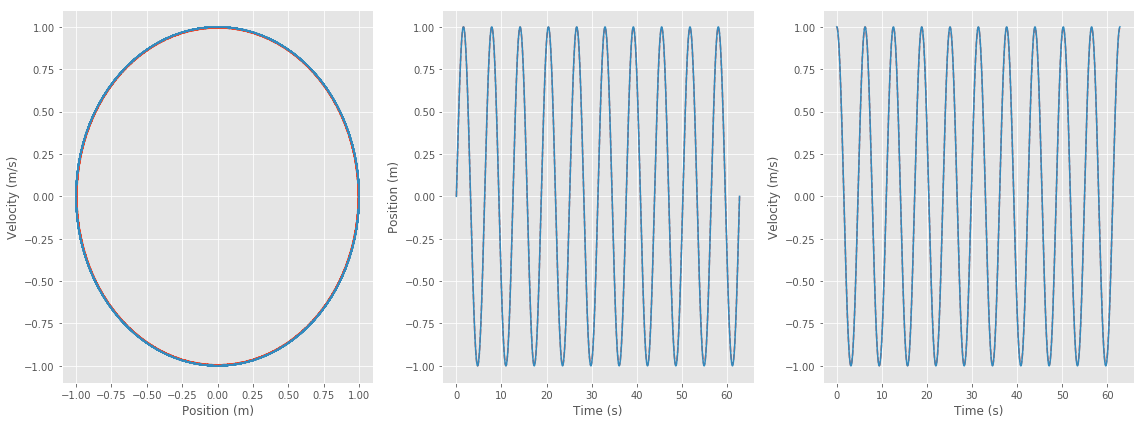

In [ ]:
# v4 

omega = 1
x0 = 0
v0 = 1
vers = 'v4'

def a(t,x):
  return -omega**2*x

T, X, V = dynamics_solve_1d(a, t_0 = 0.0, x_0 = 0.0, v_0 = 1.0, h = (2*np.pi/omega)/100, N = 1000, version = vers)
X_analytic, V_analytic = x0*np.cos(omega*T)+v0/omega*np.sin(omega*T), -x0*omega*np.sin(omega*T)+v0*np.cos(omega*T)

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
#plt.axes().set_aspect('auto')


ax[0].plot(X, V, '--')
ax[0].plot(X_analytic, V_analytic)
ax[0].set_xlabel('Position (m)')
ax[0].set_ylabel('Velocity (m/s)')

ax[1].plot(T, X, '--')
ax[1].plot(T, X_analytic)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Position (m)')

ax[2].plot(T, V, '--')
ax[2].plot(T, V_analytic)
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Velocity (m/s)')
fig.tight_layout()


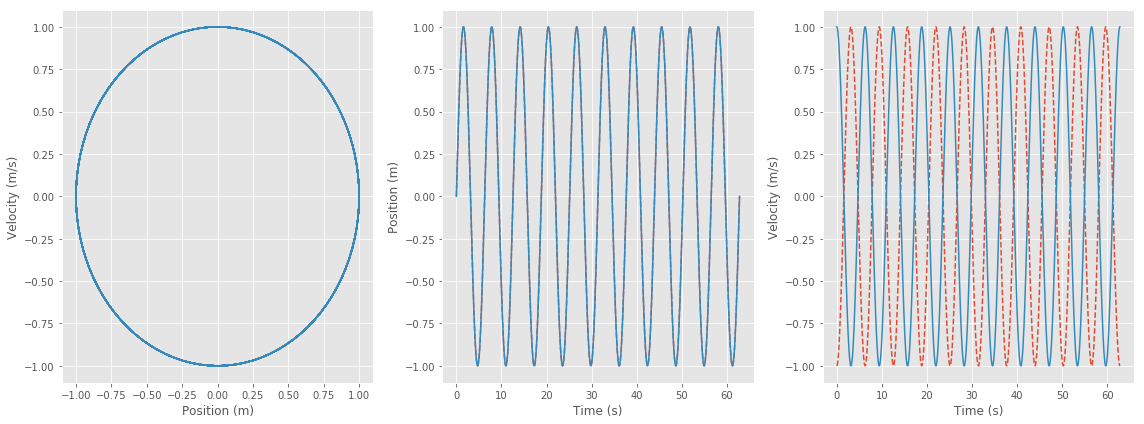

In [ ]:
# v5

omega = 1
x0 = 0
v0 = 1
vers = 'v5'

def a(t,x):
  return -omega**2*x

T, X, V = dynamics_solve_1d(a, t_0 = 0.0, x_0 = 0.0, v_0 = 1.0, h = (2*np.pi/omega)/100, N = 1000, version = vers)
X_analytic, V_analytic = x0*np.cos(omega*T)+v0/omega*np.sin(omega*T), -x0*omega*np.sin(omega*T)+v0*np.cos(omega*T)

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
#plt.axes().set_aspect('auto')


ax[0].plot(X, V, '--')
ax[0].plot(X_analytic, V_analytic)
ax[0].set_xlabel('Position (m)')
ax[0].set_ylabel('Velocity (m/s)')

ax[1].plot(T, X, '--')
ax[1].plot(T, X_analytic)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Position (m)')

ax[2].plot(T, V, '--')
ax[2].plot(T, V_analytic)
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Velocity (m/s)')
fig.tight_layout()


## Exercises - Exploring the system's dynamics before numerics

Consider the following potential which depends on three parameters: $\omega>0$, $x_R>0$, and $x_L<0$: 

$$
    \phi(x) = \omega^2x_L^2\left[
    \frac{1}{2}\left(\frac{x_R}{x_L}\right)\left(\frac{x}{x_L}\right)^2
    -\frac{1}{3}\left(1+\frac{x_R}{x_L}\right)\left(\frac{x}{x_L}\right)^3
    +\frac{1}{4}\left(\frac{x}{x_L}\right)^4
    \right]
$$

1. 
    1. --$\phi$ is a polynomial with orders 2, 3, and 4. The only powers of x that appear in $\phi$ are 2, 3 and 4. As a result, $\phi$ will in general look like a fourth-order polynomial.  
    1. -- $$\phi'=\omega^2 x_{L}^2 [\left(\frac{x_R}{x_L}\right)(\frac{x}{x_L^2})-(1+ \frac{x_R}{x_L})(\frac{x^2}{x_L^3})+(\frac{x^3}{x_L^4})]  $$
    $$\phi''= \omega^2 x_{L}^2[(\frac{x_R}{x_L})(\frac{1}{x_L^2})- 2 (1+ \frac{x_R}{x_L})(\frac{x}{x_L^3})+ 3(\frac{x^2}{x_L^4})]   $$
    1. -- The derivative of $\phi$ vanishes when $x=0$ and when $x_R-(1+x_R/x_L)x+x^2/x_L=0$. The solutions of this are 
    $$ x=\frac{(1+x_R/x_L)\pm(1-x_R/x_L)}{2/x_L} \\
    =x_L\text{ or } x_R$$
    So $\phi$ has extrema at 0, $x_R$, and $x_L$. We can plug these into $\phi''$ to learn the nature of the extrema. When $x=0$, $\phi''=\omega^2x_R/x_L$, and we are given that $x_R$ is positive and $x_L$ is negative so this is negative and the extremum is a maximum. For $x=x_R$, $\phi''=\omega^2(x_R/x_L)\left(-1+x_R/x_L\right)$ This quantity is positive because $x_R$ and $x_L$ have different signs, so this is a minimum. For $x=x_L$, $\phi''=\omega^2\left(1-x_R/x_L\right)$ which is positive so this is a minimum.
    1. -- When x is very large, the fourth-order term should dominate, and the potential behaves like $\phi\approx\omega^2x_L^2(x/x_L)^4/4$. 
    1. -- The function has minima on either side of $x=0$ and a maximum at $x=0$, so it will look like a w-shape, moving off to positive infinity for large $\left|x\right|$. In our original explanation we did not anticipate this much detail.
    1. -- See plots below. Qualitative differences we see-- For the first 3, it is symmetric in $x_{L}$ and $x_{R}$, but $\omega$ increases by 1 each time and because $\phi$ has an $\omega$ squared dependence, the y-scale increases in each of these three graphs. For the last three, $x_{R}$ moves closer to zero and we see the same differences in the range of the graph increasing due to $\omega$ increasing  by one each time. Thus changing $x_R$ and $x_L$ changes the shape of the graph (in particular, it moves the zeros) while changing $\omega$ changing only the y-scale of the graph. 
1. 
    1. --If the particle starts at rest very close to $x_{L}$, we expect the particle to oscillate about $x_{L}$. With that expectation we can define $x'=x-x_L$ such that $x=x_L(1+x'/x_L)$ where $x'/x_L$ is a small parameter. Expecting a harmonic-oscillator solution we can expand $\phi'$ to first order in this small parameter by substituting the above expression for x into $\phi'$. The resulting expression is 
    $$\phi'(x')=x'\omega^2\left(1-\frac{x_R}{x_L}\right)$$
    and so we see that the resulting equation of motion is just that of a harmonic oscillator with effective angular frequency $\omega\sqrt{1-x_R/x_L}$. The approximate trajectory would therefore be 
    $$x(t) = x_L+x'_0\cos(\omega t\sqrt{1-x_R/x_L})$$
    $$\dot{x}(t) = -\omega\sqrt{1-x_R/x_L}x'_0\sin(\omega t\sqrt{1-x_R/x_L})$$
    1. --If the particle starts at rest very close to $x_{R}$, we expect the particle to oscillate about $x_{R}$. With that expectation we can define $x'=x-x_R$ such that $x=x_R(1+x'/x_R)$ where $x'/x_R$ is a small parameter. Expecting a harmoic-oscillator solution we can expand $\phi'$ to first order in this small parameter by subsituting the above expression for x into $\phi'$. The resulting expression is 
    $$\phi'(x')=-x'\omega^{2}(x_R)^2/(x_L)^2(x_L/x_R-1)$$ and so we see that the resulting eqaution of motion is that of a harmonic oscillator with effective angular frequency $\omega(x_R/x_L)\sqrt{1-x_L/x_R}$. The general solution is analogous to that from the previous question with the new effective frequency. 
    1. --If a particle starts at rest just to the left of x=0 we expect it to roll to the left and come to the same height it started with and then start to oscillate about $x_L$.
    1. --If a particle starts at rest just to the right of x=0 we expect it to roll to the right and come to a the same height it started with and then start to oscillate about $x_R$.
    1. -- If the particle starts at x=0 with negative velocity, it will roll to the left, passing through $x_L$ and coming to a temporary stop at some point to the left of $x_L$ at which point it will roll back through $x_L$, passing x=0 and x=$x_R$, and will continue to oscillate between two points outside of $x_L$ and $x_R$. 
    1. -- If the particle starts at x=0 with positive velocity it will do qualitatively what it did in the prior question only starting off moving to the right. 

Text(0.5, 1.0, 'Potential with $\\omega=1$ rad/s, $x_R=1$ m')

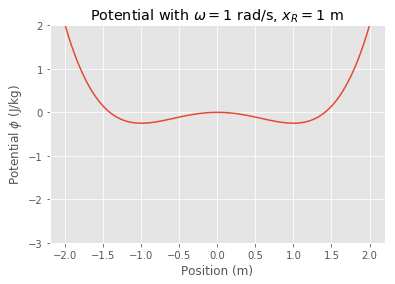

In [ ]:
def phi(x, omega, xr, xl):
  return omega**2*xl**2*(1/2*xr/xl*(x/xl)**2-1/3*(1+xr/xl)*(x/xl)**3+(x/xl)**4/4)
x=np.linspace(-2,2,100)
phi_arr=phi(x,1,1,-1)
plt.plot(x,phi_arr)
plt.ylim(-3,2)
plt.xlabel('Position (m)')
plt.ylabel(r'Potential $\phi$ (J/kg)')
plt.title(r'Potential with $\omega=1$ rad/s, $x_R=1$ m')

Text(0.5, 1.0, 'Potential with $\\omega=2$ rad/s, $x_R=1$ m')

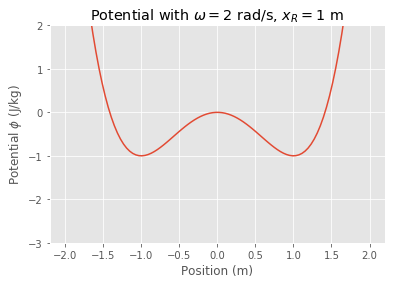

In [ ]:
def phi(x, omega, xr, xl):
  return omega**2*xl**2*(1/2*xr/xl*(x/xl)**2-1/3*(1+xr/xl)*(x/xl)**3+(x/xl)**4/4)
x=np.linspace(-2,2,100)
phi_arr=phi(x,2,1,-1)
plt.plot(x,phi_arr)
plt.ylim(-3,2)
plt.xlabel('Position (m)')
plt.ylabel(r'Potential $\phi$ (J/kg)')
plt.title(r'Potential with $\omega=2$ rad/s, $x_R=1$ m')

Text(0.5, 1.0, 'Potential with $\\omega=3$ rad/s, $x_R=1$ m')

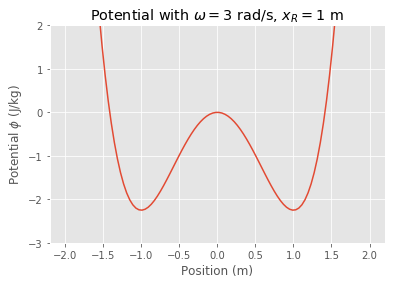

In [ ]:
def phi(x, omega, xr, xl):
  return omega**2*xl**2*(1/2*xr/xl*(x/xl)**2-1/3*(1+xr/xl)*(x/xl)**3+(x/xl)**4/4)
x=np.linspace(-2,2,100)
phi_arr=phi(x,3,1,-1)
plt.plot(x,phi_arr)
plt.ylim(-3,2)
plt.xlabel('Position (m)')
plt.ylabel(r'Potential $\phi$ (J/kg)')
plt.title(r'Potential with $\omega=3$ rad/s, $x_R=1$ m')

Text(0.5, 1.0, 'Potential with $\\omega=1$ rad/s, $x_R=0.5$ m')

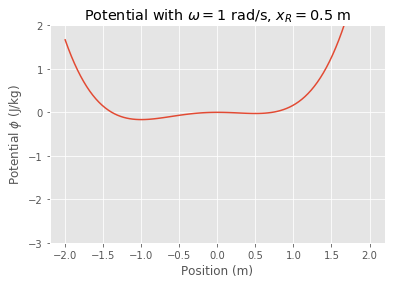

In [ ]:
def phi(x, omega, xr, xl):
  return omega**2*xl**2*(1/2*xr/xl*(x/xl)**2-1/3*(1+xr/xl)*(x/xl)**3+(x/xl)**4/4)
x=np.linspace(-2,2,100)
phi_arr=phi(x,1,0.5,-1)
plt.plot(x,phi_arr)
plt.ylim(-3,2)
plt.xlabel('Position (m)')
plt.ylabel(r'Potential $\phi$ (J/kg)')
plt.title(r'Potential with $\omega=1$ rad/s, $x_R=0.5$ m')

Text(0.5, 1.0, 'Potential with $\\omega=2$ rad/s, $x_R=0.5$ m')

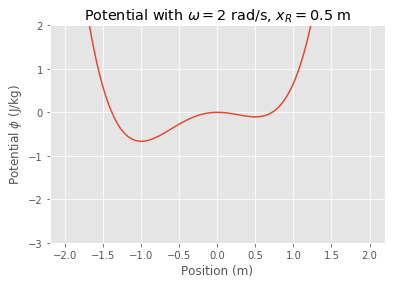

In [ ]:
def phi(x, omega, xr, xl):
  return omega**2*xl**2*(1/2*xr/xl*(x/xl)**2-1/3*(1+xr/xl)*(x/xl)**3+(x/xl)**4/4)
x=np.linspace(-2,2,100)
phi_arr=phi(x,2,0.5,-1)
plt.plot(x,phi_arr)
plt.ylim(-3,2)
plt.xlabel('Position (m)')
plt.ylabel(r'Potential $\phi$ (J/kg)')
plt.title(r'Potential with $\omega=2$ rad/s, $x_R=0.5$ m')

Text(0.5, 1.0, 'Potential with $\\omega=3$ rad/s, $x_R=0.5$ m')

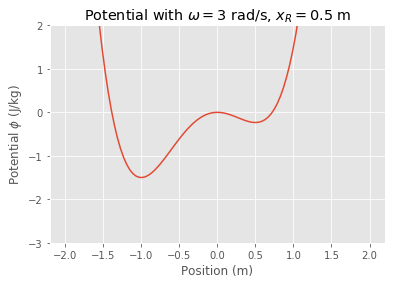

In [ ]:
def phi(x, omega, xr, xl):
  return omega**2*xl**2*(1/2*xr/xl*(x/xl)**2-1/3*(1+xr/xl)*(x/xl)**3+(x/xl)**4/4)
x=np.linspace(-2,2,100)
phi_arr=phi(x,3,0.5,-1)
plt.plot(x,phi_arr)
plt.ylim(-3,2)
plt.xlabel('Position (m)')
plt.ylabel(r'Potential $\phi$ (J/kg)')
plt.title(r'Potential with $\omega=3$ rad/s, $x_R=0.5$ m')

## Exercises - Exploring the system's dynamics numerically

1. -- We wrote down the expression for $\phi'$ in the prior problem. The equation of motion is $a=-\phi'$ or 
$$ a(x,t) = -\phi'=-\omega^2 x_{L}^2 [\left(\frac{x_R}{x_L}\right)(\frac{x}{x_L^2})-(1+ \frac{x_R}{x_L})(\frac{x^2}{x_L^3})+(\frac{x^3}{x_L^4})]$$
This problem is hard to solve with pen and paper because the force is super nonlinear (it contains terms to the second and third powers in x). 
1. -- See plot below, they agree.
1. -- See plot below, they agree.
1. -- See plot below. This result is consistent with our qualitative prediction above. From the x vs t plots, we see that the particle begins immediately moving towards negative x, passes $x_L$ at -1 m, then comes back around passing x=0 and $x_R$. It then proceeds to repeat this motion. This makes sense because the particle now has kinetic energy and therefore greater total energy, so we expected it to reach a greater height then it started with and oscillate between two points outside of $x_L$ and $x_R$. 
1. -- See plot below. This result is also consistent with our qualitative prediction, doing essentially what it does in the prior case but starting off with rightward motion instead of leftward motion. 

In [ ]:
def dynamics_solve_1d(a, t_0 = 0.0, x_0 = 1.0, v_0 = 0.0, h = 0.1, N = 100, version = "v1"):
    
    """ Solves for dynamics of a given 1d dynamical system governed by a second-order ODE:
    
        d^2x(t)/dt^2 = a(t, x(t))
    
    Args:
        a: A python function a(t, x) that assigns a float to each time and position.  Represents
        the acceleration at that time and position.
        
    Kwargs:
        t_0: Initial time (float) set to 0.0 as default
        x_0: Initial position (float) set to 1.0 as default
        v_0: Initial velocity (float) set to 0.0 as default
        h: Step size (float) set to 0.1 as default
        N: Number of steps (int) set to 100 as default
        version: The version of the numerical method to be used
    
    Returns:
        T: Numpy array of times
        X: Numpy array of positions at the times given in T
        V: Numpy array of velocities at the times given in T
    """

    T = np.array([t_0 + n * h for n in range(N + 1)])
    X = np.zeros(N + 1)
    V = np.zeros(N + 1)
        
    X[0] = x_0
    V[0] = v_0
    
    if version == "v1":
        for n in range(N):
            kx_1 = h * V[n]
            kv_1 = h * a(T[n], X[n])

            kx_2 = h * (V[n] + 0.5 * kv_1)
            kv_2 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_1)

            kx_3 = h * (V[n] + 0.5 * kv_2)
            kv_3 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_2)

            kx_4 = h * (V[n] + kv_3)
            kv_4 = h * a(T[n] + 1.0 * h, X[n] + 1.0 * kx_3)

            X[n + 1] = X[n] + (kx_1 + 2. * kx_2 + 2. * kx_3 + kx_4) / 6.
            V[n + 1] = V[n] + (kv_1 + 2. * kv_2 + 2. * kv_3 + kx_4) / 6.
        
        return T, X, V
    
    if version == "v2":
        for n in range(N):
            kx_1 = h * V[n]
            kv_1 = h * a(T[n], X[n])

            kx_2 = h * (V[n] + 0.5 * kv_1)
            kv_2 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_1)

            kx_3 = h * (V[n] + 0.5 * kv_2)
            kv_3 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_2)

            kx_4 = h * (V[n] + kv_3)
            kv_4 = h * a(T[n] + 1.0 * h, X[n] + 1.0 * kx_3)

            X[n + 1] = X[n] + (kx_1 + 2. * kx_2 + 2. * kx_3 + kx_4) / 6.
            V[n + 1] = V[n] + (kv_1 + 2. * kv_2 + 2. * kv_3 + kv_4) / 6.
            
        return T, X, V
            
    if version == "v3":
        for n in range(N):
            kx_1 = h * V[n]
            kv_1 = h * a(T[n], X[n])

            kx_2 = h * (V[n] + 0.5 * kv_1)
            kv_2 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_1)

            kx_3 = h * (V[n] + 0.5 * kv_2)
            kv_3 = h * a(T[n] + 0.5 * h, X[n] - 0.5 * kx_2)

            kx_4 = h * (V[n] + kv_3)
            kv_4 = h * a(T[n] + 1.0 * h, X[n] + 1.0 * kx_3)

            X[n + 1] = X[n] + (kx_1 + 2. * kx_2 + 2. * kx_3 + kx_4) / 6.
            V[n + 1] = V[n] + (kv_1 + 2. * kv_2 + 2. * kv_3 + kv_4) / 6.
            
        return T, X, V
    
    if version == "v4":
        for n in range(N):
            kx_1 = h * V[n]
            kv_1 = h * a(T[n], X[n])

            kx_2 = h * (V[n] + 0.5 * kv_1)
            kv_2 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_1)

            kx_3 = h * (V[n] + 0.5 * kv_2)
            kv_3 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_2) 

            kx_4 = h * (V[n] + kv_3)
            kv_4 = h * a(T[n] + 1.0 * h, X[n] + 1.02 * kx_3)

            X[n + 1] = X[n] + (kx_1 + 2. * kx_2 + 2. * kx_3 + kx_4) / 6.
            V[n + 1] = V[n] + (kv_1 + 2. * kv_2 + 2. * kv_3 + kv_4) / 6.
            
        return T, X, V
    
    if version == "v5":
        for n in range(N):
            kx_1 = h * V[n]
            kv_1 = h * a(T[n], X[n])

            kx_2 = h * (V[n] + 0.5 * kv_1)
            kv_2 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_1)

            kx_3 = h * (V[n] + 0.5 * kv_2)
            kv_3 = h * a(T[n] + 0.5 * h, X[n] + 0.5 * kx_2)

            kx_4 = h * (V[n] + kv_3)
            kv_4 = h * a(T[n] + 1.0 * h, X[n] + 1.0 * kx_3)

            X[n + 1] = X[n] + (kx_1 + 2. * kx_2 + 2. * kx_3 + kx_4) / 6.
            V[n + 1] = V[n] + (kv_1 + 2. * kv_2 + 2. * kv_3 + kv_4) / 6.
            
        return T, X, -V

Text(0.5, 0.98, 'Starting Near $x_L$')

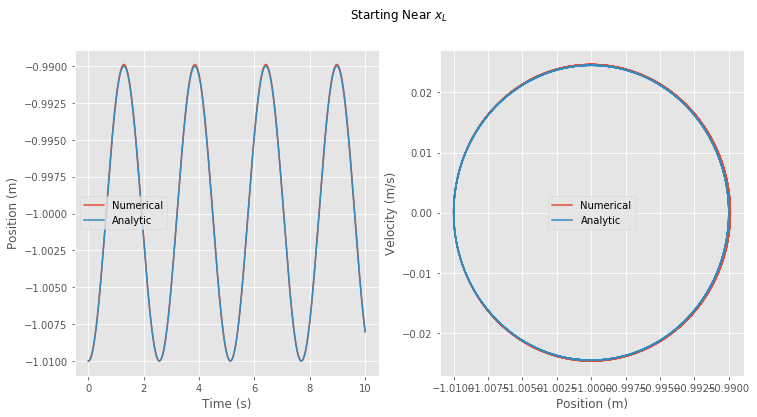

In [ ]:
def a(t, x):
  return -omega**2*xL**2*(xR/xL*x/xL**2-(1+xR/xL)*x**2/xL**3+x**3/xL**4)

omega = 2
xL = -1
xR = 0.5

x0 = xL*(1+1/100)
xp0 = x0-xL
v0 = 0

T, X, V = dynamics_solve_1d(a, t_0 = 0.0, x_0 = x0, v_0 = v0, h = 0.01, N = 1000, version = "v2")

X_analytic = xL + xp0*np.cos(omega*np.sqrt(1-xR/xL)*T)
V_analytic = -xp0*omega*np.sqrt(1-xR/xL)*np.sin(omega*np.sqrt(1-xR/xL)*T)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(T, X)
ax[0].plot(T, X_analytic)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')
ax[0].legend(['Numerical', 'Analytic'])

ax[1].plot(X, V)
ax[1].plot(X_analytic, V_analytic)
ax[1].set_xlabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')
ax[1].legend(['Numerical', 'Analytic'])

fig.suptitle(r'Starting Near $x_L$')

Text(0.5, 0.98, 'Starting Near $x_R$')

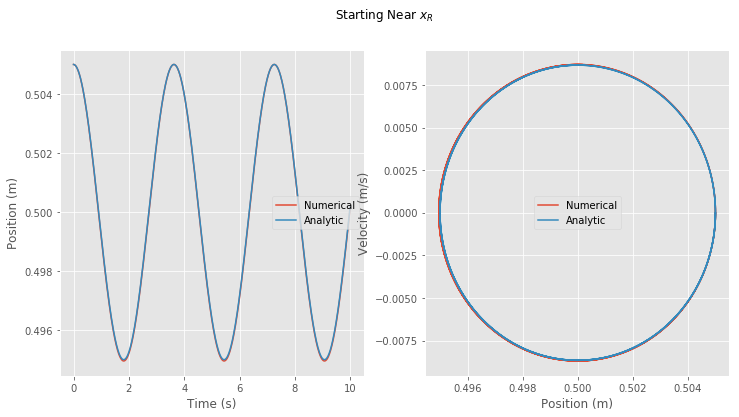

In [ ]:
def a(t, x):
  return -omega**2*xL**2*(xR/xL*x/xL**2-(1+xR/xL)*x**2/xL**3+x**3/xL**4)

omega = 2
xL = -1
xR = 0.5

x0 = xR*(1+1/100)
xp0 = x0-xR
v0 = 0

T, X, V = dynamics_solve_1d(a, t_0 = 0.0, x_0 = x0, v_0 = v0, h = 0.01, N = 1000, version = "v2")

X_analytic = xR + xp0*np.cos(omega*xR/xL*np.sqrt(1-xL/xR)*T)
V_analytic = -xp0*omega*xR/xL*np.sqrt(1-xL/xR)*np.sin(omega*xR/xL*np.sqrt(1-xL/xR)*T)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(T, X)
ax[0].plot(T, X_analytic)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')
ax[0].legend(['Numerical', 'Analytic'])

ax[1].plot(X, V)
ax[1].plot(X_analytic, V_analytic)
ax[1].set_xlabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')
ax[1].legend(['Numerical', 'Analytic'])

fig.suptitle(r'Starting Near $x_R$')

Text(0.5, 0.98, 'Starting At 0 with Negative Velocity')

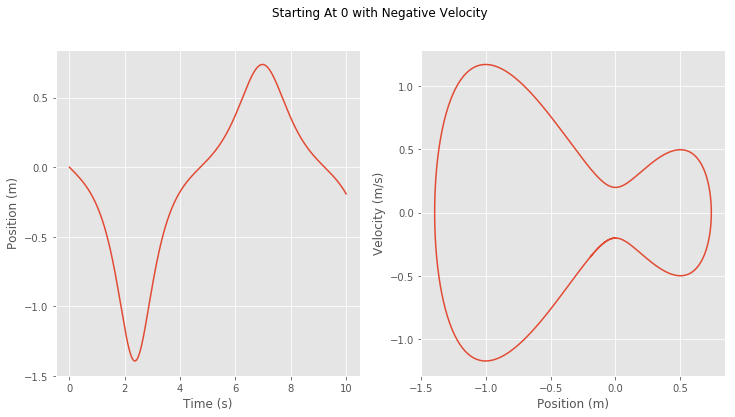

In [ ]:
def a(t, x):
  return -omega**2*xL**2*(xR/xL*x/xL**2-(1+xR/xL)*x**2/xL**3+x**3/xL**4)

omega = 2
xL = -1
xR = 0.5

x0 = 0
xp0 = x0-xR
v0 = -.2

T, X, V = dynamics_solve_1d(a, t_0 = 0.0, x_0 = x0, v_0 = v0, h = 0.01, N = 1000, version = "v2")


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(T, X)

ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')


ax[1].plot(X, V)

ax[1].set_xlabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')

fig.suptitle('Starting At 0 with Negative Velocity')

Text(0.5, 0.98, 'Starting at 0 with Positive Velocity')

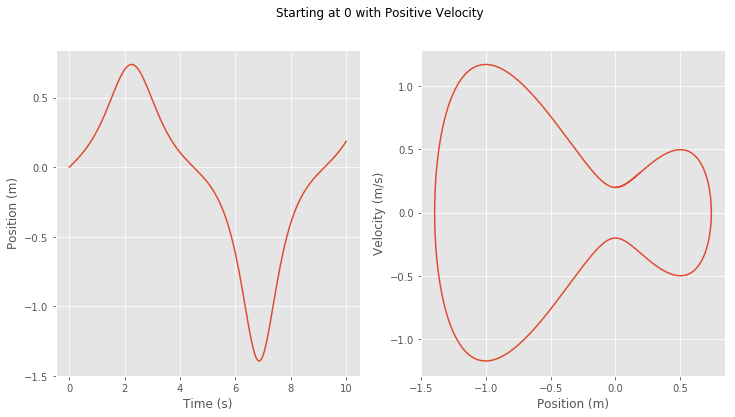

In [ ]:
def a(t, x):
  return -omega**2*xL**2*(xR/xL*x/xL**2-(1+xR/xL)*x**2/xL**3+x**3/xL**4)

omega = 2
xL = -1
xR = 0.5

x0 = 0
xp0 = x0-xR
v0 = .2

T, X, V = dynamics_solve_1d(a, t_0 = 0.0, x_0 = x0, v_0 = v0, h = 0.01, N = 1000, version = "v2")


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(T, X)

ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')


ax[1].plot(X, V)

ax[1].set_xlabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')

fig.suptitle('Starting at 0 with Positive Velocity')